In [1]:

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

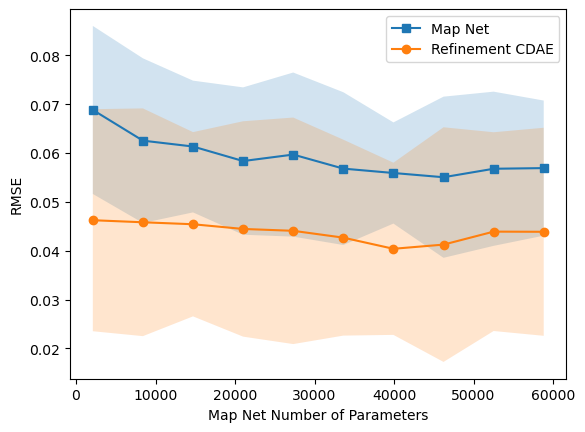

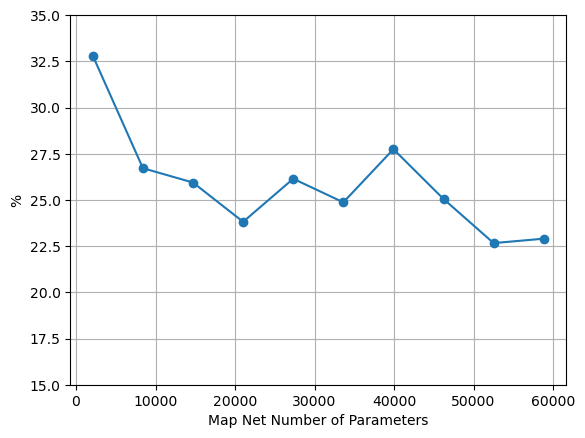

In [2]:


####* scaling hidden_dim mapping - V2 file

hidden_dim_mapping = np.array([100, 400, 700, 1000, 1300, 1600, 1900, 2200, 2500, 2800])

params_hidden_dim_map = np.array([2117, 8417, 14717, 21017, 27317, 33617, 39917, 46217, 52517, 58817])

params_cdae = 29337

rmse_mean_hidden_dim_map = np.array([0.06883744491827906, 0.0625483395836194, 0.061347095188883816, 0.05837188660870317, 0.059697607912400974, 0.05682187928162262, 0.05592558751702683, 0.055058237172230316, 0.056793740559570774, 0.05692871165846939])
rmse_std_hidden_dim_map = np.array([0.017199291150547136, 0.016854311620027557, 0.01348630875753738, 0.01508293866985828, 0.016799196058462574, 0.015639126748177887, 0.010353645735007456, 0.016496763091894587, 0.015784613508012735, 0.013829405697063863])

rmse_mean_hidden_dim_refined = np.array([0.04625859940992229, 0.04583744497043919, 0.045433572845813536, 0.044470462483425545, 0.044089325552366526, 0.04269049146248856, 0.04040839275271514, 0.04126575048870052, 0.04392233103618872, 0.043890342718155916])
rmse_std_hidden_dim_refined = np.array([0.022729306199030696, 0.023313206930072574, 0.018860866770003006, 0.022047642951874852, 0.023188220651169454, 0.020056914283428144, 0.01762499110978341, 0.024018944239747014, 0.020346632170375946, 0.02129687561020727])


plt.figure()
plt.plot(params_hidden_dim_map, rmse_mean_hidden_dim_map, marker='s', label='Map Net')
plt.fill_between(params_hidden_dim_map,
                 rmse_mean_hidden_dim_map - rmse_std_hidden_dim_map,
                 rmse_mean_hidden_dim_map + rmse_std_hidden_dim_map,
                 alpha=0.2)

plt.plot(params_hidden_dim_map, rmse_mean_hidden_dim_refined, marker='o', label='Refinement CDAE')
plt.fill_between(params_hidden_dim_map,
                    rmse_mean_hidden_dim_refined - rmse_std_hidden_dim_refined,
                    rmse_mean_hidden_dim_refined + rmse_std_hidden_dim_refined,
                    alpha=0.2)
plt.xlabel('Map Net Number of Parameters')
plt.ylabel('RMSE')
plt.legend()
plt.savefig('figures/1-rmse_vs_paramsV2.png')

gain_cdae = np.abs(rmse_mean_hidden_dim_map - rmse_mean_hidden_dim_refined) / rmse_mean_hidden_dim_map


plt.figure()
plt.plot(params_hidden_dim_map, gain_cdae*100, marker='o', label='Gain')
plt.xlabel('Map Net Number of Parameters')
plt.ylabel('%')
plt.ylim(15, 35)
plt.grid()
plt.savefig('figures/1-gain_vs_paramsV2.png')


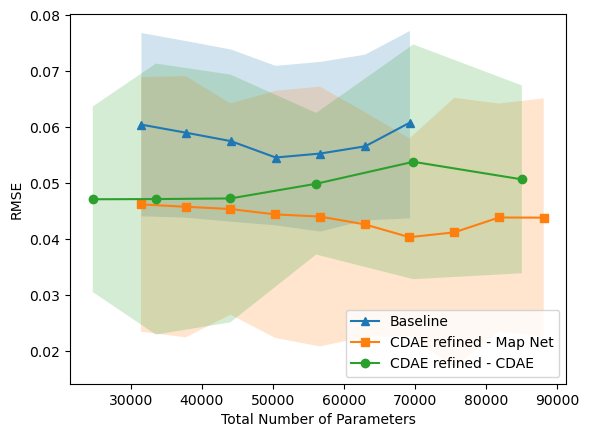

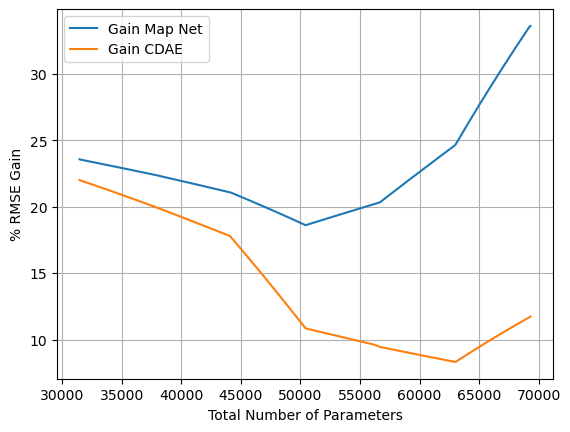

In [3]:

####* Basline comparison with other scalling models and cdae dim increase


params_hidden_dim_map_augmented = params_hidden_dim_map + params_cdae

params_cdae_augmented = np.array([17394, 24674, 33554, 44034, 56114, 69794, 85074])
rmse_cdae_refined_augmented = np.array([0.05713714, 0.04717501, 0.04721026, 0.04732026, 0.04994311, 0.05386284, 0.05072753])
std_cdae_refined_augmented = np.array([0.01810693, 0.01656836, 0.02419083, 0.02212456, 0.01264047, 0.02094965, 0.01676805])


params_baseline = np.array([25217, 31517, 37817, 44117, 50417, 56717, 63017, 69317])
rmse_mean_baseline = np.array([0.06284528, 0.06049523, 0.05905022, 0.05755293, 0.0546298, 0.05533897, 0.05662927, 0.06086493])
rmse_std_baseline = np.array([0.01939409, 0.01636035, 0.01516581, 0.01438418, 0.01211507, 0.01393774, 0.01323427, 0.01710392])

plt.plot(params_baseline[1:], rmse_mean_baseline[1:], marker='^', label='Baseline')
plt.fill_between(params_baseline[1:],
                 rmse_mean_baseline[1:] - rmse_std_baseline[1:],
                 rmse_mean_baseline[1:] + rmse_std_baseline[1],
                 alpha=0.2)
plt.plot(params_hidden_dim_map_augmented, rmse_mean_hidden_dim_refined, marker='s', label='CDAE refined - Map Net')
plt.fill_between(params_hidden_dim_map_augmented,
                    rmse_mean_hidden_dim_refined - rmse_std_hidden_dim_refined,
                    rmse_mean_hidden_dim_refined + rmse_std_hidden_dim_refined,
                    alpha=0.2)
plt.plot(params_cdae_augmented[1:], rmse_cdae_refined_augmented[1:], marker='o', label='CDAE refined - CDAE')
plt.fill_between(params_cdae_augmented[1:],
                    rmse_cdae_refined_augmented[1:] - std_cdae_refined_augmented[1:],
                    rmse_cdae_refined_augmented[1:] + std_cdae_refined_augmented[1:],
                    alpha=0.2)

plt.legend()
plt.xlabel('Total Number of Parameters')
plt.ylabel('RMSE')
plt.savefig('figures/1-rmse_vs_params_baselineV2.png')



### plot percentage gain
interp_baseline = sp.interpolate.interp1d(params_baseline, rmse_mean_baseline)
interp_refined = sp.interpolate.interp1d(params_hidden_dim_map_augmented, rmse_mean_hidden_dim_refined)
interp_cdae = sp.interpolate.interp1d(params_cdae_augmented, rmse_cdae_refined_augmented)

lin_vec = np.linspace(params_hidden_dim_map_augmented[0], params_baseline[-1], 1000)

gain_baseline = np.abs(interp_baseline(lin_vec) - interp_refined(lin_vec)) / interp_baseline(lin_vec)
gain_cdae_augmented = np.abs(interp_baseline(lin_vec) - interp_cdae(lin_vec)) / interp_baseline(lin_vec)


plt.figure()
plt.plot(lin_vec, gain_baseline*100, label='Gain Map Net')
plt.plot(lin_vec, gain_cdae_augmented*100, label='Gain CDAE')
plt.xlabel('Total Number of Parameters')
plt.ylabel('% RMSE Gain')
plt.grid()
plt.legend()

plt.savefig('figures/1-gain_vs_params_baselineV2.png')



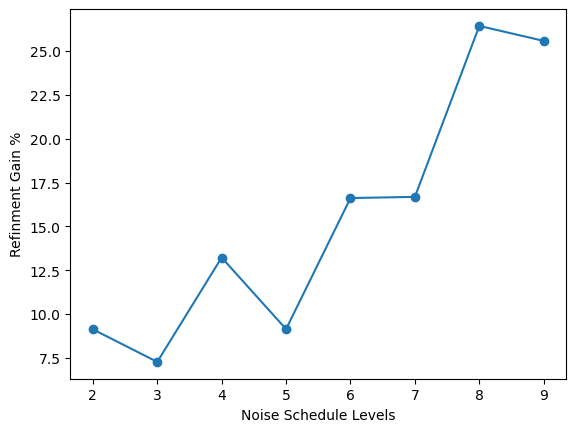

In [6]:

###* noise schedule new CDAE model - cdae_results_scaling_noise_shedule_new

noise_schedule_levels = np.array([2, 3, 4, 5, 6, 7, 8, 9])

rmse_mean_noise_schedule = np.array([0.05793313, 0.05943782, 0.05532442, 0.0574968, 0.05463495, 0.05514992, 0.0469031, 0.05086797])
rmse_mean_map = np.array([0.06375674, 0.06409944, 0.06375674, 0.0632828, 0.06552353, 0.06619451, 0.06375674, 0.06835312])

plt.figure()
plt.plot(noise_schedule_levels, np.abs(rmse_mean_map - rmse_mean_noise_schedule)/rmse_mean_map*100, marker='o', label='Gain %')
plt.xlabel('Noise Schedule Levels')
plt.ylabel('Refinment Gain %')
plt.savefig('figures/1-gain_vs_noise_scheduleV2.png')

In [5]:
# #### different noise schedules


# noise_schedule_size = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

# rmse_map_noise = np.array(
#     [0.06620323, 0.06760455, 0.06620323, 0.06636812, 0.06456691, 0.06389237,0.06620323, 0.06371749, 0.06560123, 0.06408717, 0.06598326, 0.06503836,0.06609165, 0.06397375]
# )

# rmse_refined_noise = np.array(
#      [0.06220055, 0.05935453, 0.06060403, 0.06034313, 0.05988306, 0.05698239, 0.06038521, 0.05865701, 0.05390475, 0.05194586, 0.06250082, 0.05955829,0.05421358, 0.04394753]
# )


# plt.figure()
# # plt.plot(noise_schedule_size, rmse_map_noise, marker='s', label='Map Net')
# # plt.plot(noise_schedule_size, rmse_refined_noise, marker='o', label='Refinement CDAE')

# plt.plot(noise_schedule_size, (rmse_map_noise-rmse_refined_noise)/rmse_map_noise*100)
# plt.xlabel('Noise Schedule Size')
# plt.ylabel('RMSE Gain (%)')